In [1]:
!pip install -q -U keras-tuner

In [2]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,confusion_matrix

import keras
from keras.models import sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical

import keras_tuner as kt

In [3]:
# import the dataset
data=pd.read_csv("IRIS.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# lets ceck for out liers
from com_in_nitin.utils import *

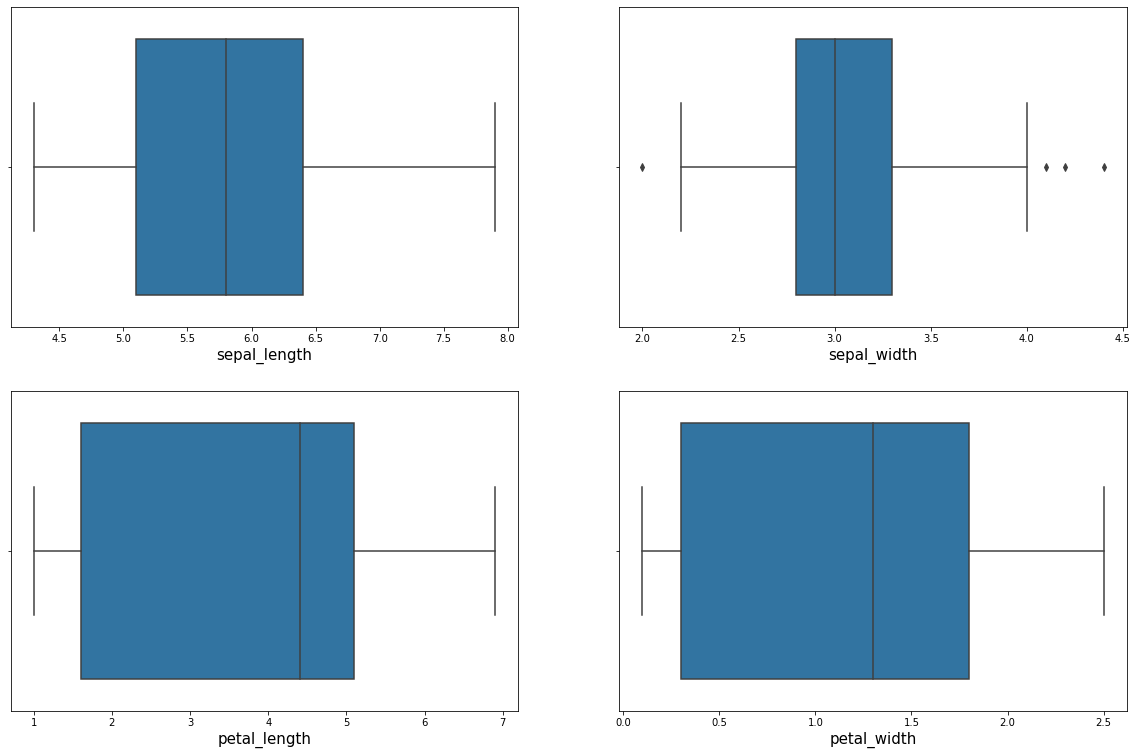

In [9]:
DFboxplot(data)

In [10]:
data=removeOutier(data,["sepal_width"])

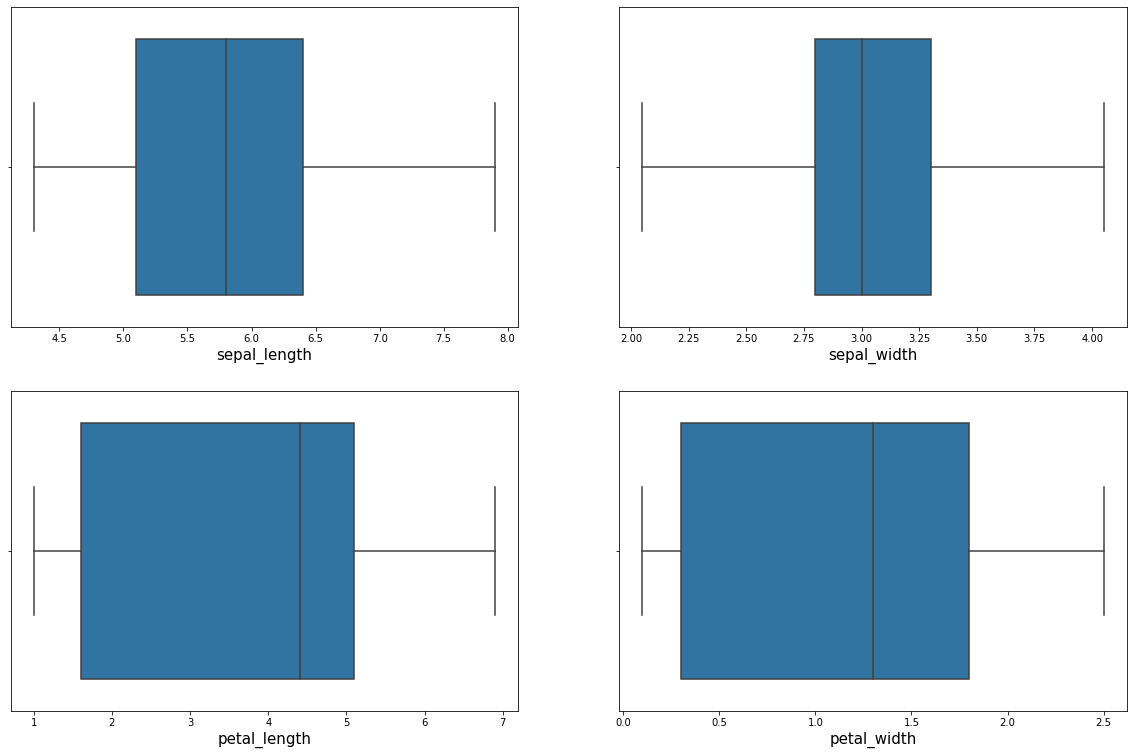

In [11]:
DFboxplot(data)

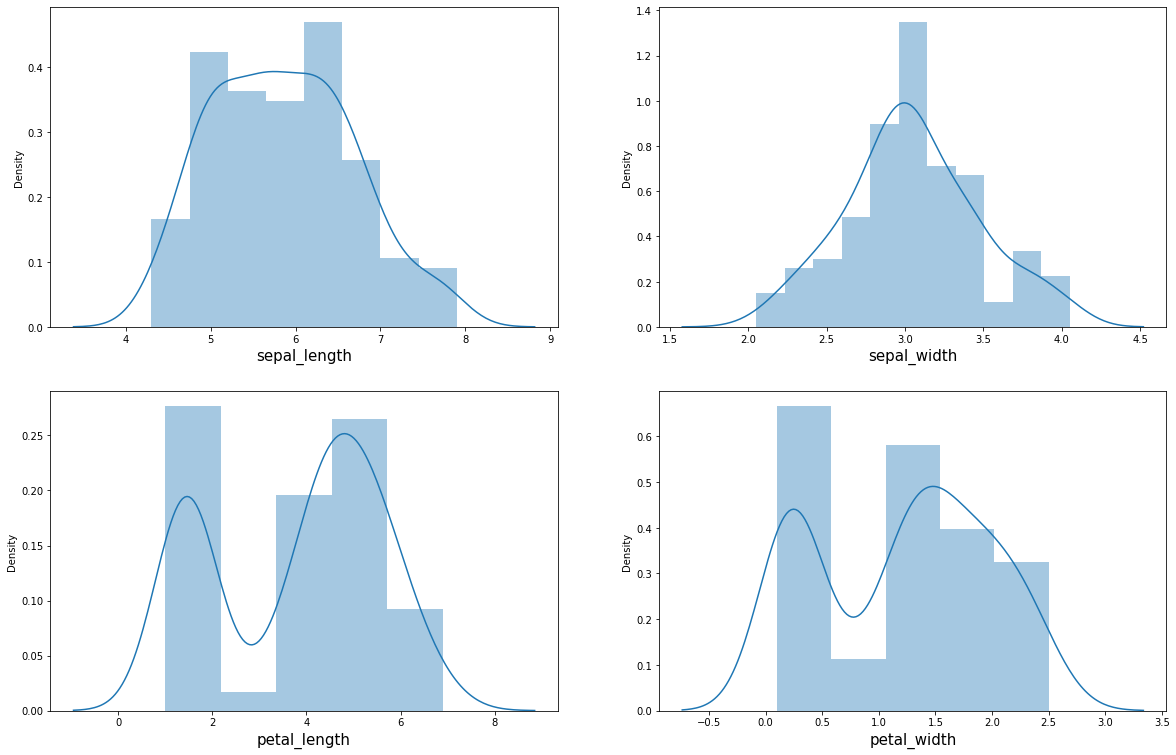

In [12]:
DFdistplot(data)

<AxesSubplot:>

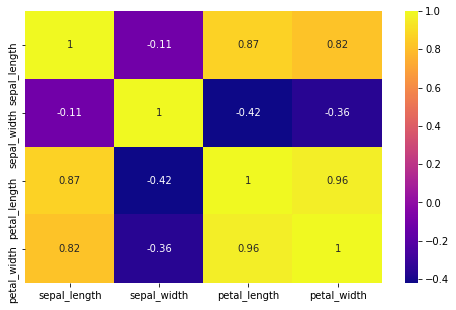

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),cmap='plasma',annot=True)

In [14]:
data.groupby(["species"]).sepal_width.agg(['sum'])

,sum
species,
Iris-setosa,164.15
Iris-versicolor,138.55
Iris-virginica,146.00


In [15]:
y=data["species"]
X=data.drop(["species"],axis=1)

In [16]:
sc=StandardScaler()
col=X.columns
X=pd.DataFrame(sc.fit_transform(X),columns=col)

In [17]:
encoder=LabelEncoder()

In [18]:
encoder.fit(y)

LabelEncoder()

In [19]:
y_dummy=encoder.transform(y)

In [20]:
y_dummy=to_categorical(y_dummy)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y_dummy,test_size=.20,random_state=45)

In [39]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [40]:
tuner = kt.RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [41]:
tuner.search(X_train, y_train, epochs=5)

Trial 6 Complete [00h 00m 04s]
accuracy: 0.6666666865348816

Best accuracy So Far: 0.9230769276618958
Total elapsed time: 00h 00m 21s
INFO:tensorflow:Oracle triggered exit


In [44]:
models=tuner.get_best_models()

In [45]:
model=models[0]

In [49]:
hps=tuner.get_best_hyperparameters()

In [50]:
hp=hps[0]

In [51]:
model=build_model(hp)

In [55]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5220 - accuracy: 0.8291
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3091 - accuracy: 0.8632
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2558 - accuracy: 0.8889
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2018 - accuracy: 0.9145
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1716 - accuracy: 0.9060
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1429 - accuracy: 0.9487
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1228 - accuracy: 0.9487
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1708 - accuracy: 0.9145
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2016 - accuracy: 0.9060
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1321 - accuracy: 0.9316
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 7ms/step - loss: 1.7960e-04 - accuracy: 1.0000
Epoch 84/100
4/4 [==============================] - 0s 7ms/step - loss: 1.6677e-04 - accuracy: 1.0000
Epoch 85/100
4/4 [==============================] - 0s 6ms/step - loss: 1.6394e-04 - accuracy: 1.0000
Epoch 86/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5503e-04 - accuracy: 1.0000
Epoch 87/100
4/4 [==============================] - 0s 6ms/step - loss: 1.4776e-04 - accuracy: 1.0000
Epoch 88/100
4/4 [==============================] - 0s 7ms/step - loss: 1.3965e-04 - accuracy: 1.0000
Epoch 89/100
4/4 [==============================] - 0s 7ms/step - loss: 1.3575e-04 - accuracy: 1.0000
Epoch 90/100
4/4 [==============================] - 0s 7ms/step - loss: 1.3242e-04 - accuracy: 1.0000
Epoch 91/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2862e-04 - accuracy: 1.0000
Epoch 92/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2027e-04 - accuracy: 

In [56]:
y_pred=model.predict(X_test)

In [59]:
for i in range(0,y_pred.shape[0]):
    m=max(y_pred[i])
    if y_pred[i][0]==m:
        y_pred[i][0]=1
        y_pred[i][1]=0
        y_pred[i][2]=0
    elif y_pred[i][1]==m:
        y_pred[i][0]=0
        y_pred[i][1]=1
        y_pred[i][2]=0
    else:
        y_pred[i][0]=0
        y_pred[i][1]=0
        y_pred[i][2]=1

In [60]:
accuracy_score(y_pred,y_test)

0.9666666666666667